In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Membaca dataset
data_nilai = pd.read_csv('dataset/Data Nilai Mata Kuliah Alumni Prodi Informatika Universitas Gunadarma_Ver3 - NilaiVer3.csv')
data_profesi = pd.read_csv('dataset/Data Profil Alumni Prodi Informatika Universitas Gunadarma_Ver3 - ProfesiVer3.csv')

In [3]:
data_nilai

,ID,NAMA MK,JENIS,SKS,NILAI
0,Alumni001,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
1,Alumni001,ALGORITMA DAN PEMROGRAMAN 2,U,2,B
2,Alumni001,ALGORITMA DAN PEMROGRAMAN 3,U,2,A
3,Alumni001,ALGORITMA DAN PENGOLAHAN PARALEL,W,3,B
4,Alumni001,ALGORITMA DEEP LEARNING,W,2,A
...,...,...,...,...,...
38709,Alumni491,TEKNIK KOMPILASI,W,3,A
38710,Alumni491,TEKNOLOGI GAME,W,1,A
38711,Alumni491,TEKNOLOGI KECERDASAN ARTIFICIAL,W,2,A
38712,Alumni491,TEORI BAHASA DAN OTOMATA,U,3,B


In [4]:
data_profesi

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN
0,Alumni001,3.61,2020,System Analyst
1,Alumni002,3.55,2020,Software Quality Assurance Engineer
2,Alumni003,3.30,2020,Software Engineer
3,Alumni004,3.10,2020,Data Engineer
4,Alumni005,3.26,2020,Software Engineer
...,...,...,...,...
486,Alumni487,3.70,2023,Software Quality Assurance Engineer
487,Alumni488,3.87,2023,Software Engineer
488,Alumni489,3.62,2023,Software Engineer
489,Alumni490,3.48,2023,System Analyst


In [5]:
# Remove the columns 'SKS' and 'JENIS' from dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['SKS', 'JENIS'])

In [6]:
# Merge the two datasets based on 'ID' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi, nilai_alumni_cleaned, on='ID')

In [7]:
merged_data

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN,NAMA MK,NILAI
0,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 1,A
1,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 2,B
2,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 3,A
3,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PENGOLAHAN PARALEL,B
4,Alumni001,3.61,2020,System Analyst,ALGORITMA DEEP LEARNING,A
...,...,...,...,...,...,...
38709,Alumni491,3.70,2023,Software Quality Assurance Engineer,TEKNIK KOMPILASI,A
38710,Alumni491,3.70,2023,Software Quality Assurance Engineer,TEKNOLOGI GAME,A
38711,Alumni491,3.70,2023,Software Quality Assurance Engineer,TEKNOLOGI KECERDASAN ARTIFICIAL,A
38712,Alumni491,3.70,2023,Software Quality Assurance Engineer,TEORI BAHASA DAN OTOMATA,B


In [8]:
# To see the count of each grade
grade_counts = merged_data['NILAI'].value_counts()
grade_counts


NILAI
A    22311
B    14670
C     1623
D      110
Name: count, dtype: int64

In [9]:
# Change the data type of the 'NAMA MK' column to INDEX
merged_data['INDEX'] = merged_data['NAMA MK']

In [10]:
# show all columns
data_nilai.columns

Index(['ID', 'NAMA MK', 'JENIS', 'SKS', 'NILAI'], dtype='object')

In [11]:
data_profesi.columns

Index(['ID', 'IPK', 'TAHUN LULUS', 'PROFESI PEKERJAAN'], dtype='object')

In [12]:
# Pivots the merged data table to create a table with the student's ID, IPK, PROFESI PEKERJAAN as rows, and the subject indices as columns, with the student's grades as the values.

# The `pivot_table` function is used to reshape the data from a long format to a wide format, with the subject indices as the column names and the grades as the values. The `first` aggregation function is used to handle any duplicate grades for a student in a subject.

# The resulting `pivoted_grades` DataFrame will have the student information (ID, IPK, PROFESI PEKERJAAN) as the index, and the subject grades as the columns, with 0 filled in for any subjects not taken by a student.


pivoted_grades = merged_data.pivot_table(
    index=['ID', 'IPK', 'PROFESI PEKERJAAN'], 
    columns='INDEX', 
    values='NILAI', 
    aggfunc='first'  # Take the first occurrence if there are duplicates
).reset_index()

# Merge the pivoted table back to the original data to align with the rest of the information
# This will leave 0 for subjects not taken by each student

pivoted_grades.fillna(0, inplace=True)

pivoted_grades.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [13]:
pivoted_grades

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Alumni487,3.70,Software Quality Assurance Engineer,A,B,A,B,B,A,A,...,A,A,A,B,0,A,A,A,A,A
487,Alumni488,3.87,Software Engineer,A,A,A,B,A,A,B,...,A,A,A,A,0,B,A,A,A,A
488,Alumni489,3.62,Software Engineer,A,B,A,A,A,B,B,...,B,B,B,A,0,A,A,0,B,A
489,Alumni490,3.48,System Analyst,A,B,A,A,B,B,B,...,0,B,C,B,0,C,A,A,A,A


In [14]:
# Replace NaN values with 0 for the grade columns
pivoted_grades_filled = pivoted_grades.fillna(0)

# Display the updated data with NaN replaced by 0
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [15]:
# Define the grade mapping
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

# Apply the grade mapping to all relevant columns that contain grades
# We'll apply this mapping to all columns except 'NPM', 'IPK', 'PROFESI', and 'PEKARJAAN'

# Selecting only grade columns
grade_columns = pivoted_grades_filled.columns.difference(['ID', 'IPK', 'PROFESI', 'PEKERJAAN'])

# Apply grade mapping to these columns
pivoted_grades_filled[grade_columns] = pivoted_grades_filled[grade_columns].replace(grade_mapping)


# Display the updated dataframe
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,Software Quality Assurance Engineer,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,Software Engineer,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,Software Engineer,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
5,Alumni006,3.29,IT Project Manager,3,3,4,3,4,3,3,...,4,4,3,3,0,3,4,0,3,0
6,Alumni007,3.25,Data Analyst,3,3,3,3,4,4,3,...,4,4,2,3,0,4,4,0,3,0
7,Alumni008,3.36,Network Engineer,3,3,4,3,3,4,3,...,4,3,4,3,0,3,4,0,3,0
8,Alumni009,3.67,Software Quality Assurance Engineer,2,4,4,4,4,4,3,...,4,4,3,4,0,4,4,0,3,0
9,Alumni010,3.87,Graphic Designer,4,3,4,3,4,4,4,...,4,4,4,4,0,4,4,0,4,0


### Restrukturisasi data

1. Mapping Kolom Profesi Pekerjaan berdasarkan peta okupasi nasional bidang TIK

In [16]:
# Mapping Profesi Pekerjaan berdasarkan pemetaan okupasi nasional
mapping = {
    'Data Engineer': 'DATA MANAGEMENT SYSTEM',
    'Data Analyst': 'DATA MANAGEMENT SYSTEM',
    'Data Scientist': 'DATA MANAGEMENT SYSTEM',
    'Database Administrator': 'DATA MANAGEMENT SYSTEM',
    'Network Security Analyst': 'HARDWARE AND DIGITAL PERIPHERALS',
    'System Analyst': 'INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT',
    'Graphic Designer': 'IT MULTEMEDIA',
    'UI/UX Designer': 'IT MULTEMEDIA',
    'Product Designer': 'IT MULTEMEDIA',
    'IT Project Manager': 'IT PROJECT MANAGEMENT',
    'Software Quality Assurance Engineer': 'IT SECURITY AND COMPLIANCE',
    'Cyber Security Analyst': 'IT SECURITY AND COMPLIANCE',
    'Network Security Engineer': 'IT SECURITY AND COMPLIANCE',
    'Network Engineer': 'NETWORK AND INFRASTRUCTURE',
    'Software Developer': 'PROGRAMMING AND SOFTWARE DEVELOPMENT',
    'Software Engineer': 'PROGRAMMING AND SOFTWARE DEVELOPMENT'
}

# Apply the mapping to the 'PROFESI PEKERJAAN' column
pivoted_grades_filled['PROFESI PEKERJAAN'] = pivoted_grades_filled['PROFESI PEKERJAAN'].map(mapping)

In [17]:
pivoted_grades_filled

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,IT SECURITY AND COMPLIANCE,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,PROGRAMMING AND SOFTWARE DEVELOPMENT,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,DATA MANAGEMENT SYSTEM,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Alumni487,3.70,IT SECURITY AND COMPLIANCE,4,3,4,3,3,4,4,...,4,4,4,3,0,4,4,4,4,4
487,Alumni488,3.87,PROGRAMMING AND SOFTWARE DEVELOPMENT,4,4,4,3,4,4,3,...,4,4,4,4,0,3,4,4,4,4
488,Alumni489,3.62,PROGRAMMING AND SOFTWARE DEVELOPMENT,4,3,4,4,4,3,3,...,3,3,3,4,0,4,4,0,3,4
489,Alumni490,3.48,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,4,3,4,4,3,3,3,...,0,3,2,3,0,2,4,4,4,4


In [18]:
export_columns = pivoted_grades.columns

with open("all_columns.txt", "w") as f:
    for col in export_columns:
        f.write(col + "\n")

Pisah kolom PROFESI PEKERJAAN

In [19]:
pivoted_grades["OKUPASI"] = pivoted_grades["PROFESI PEKERJAAN"]
okupasi = pivoted_grades["OKUPASI"]

In [20]:
okupasi

0                           System Analyst
1      Software Quality Assurance Engineer
2                        Software Engineer
3                            Data Engineer
4                        Software Engineer
                      ...                 
486    Software Quality Assurance Engineer
487                      Software Engineer
488                      Software Engineer
489                         System Analyst
490    Software Quality Assurance Engineer
Name: OKUPASI, Length: 491, dtype: object

Pisah id_alumni

In [21]:
id_alumni = pivoted_grades["ID"]

In [22]:
id_alumni

0      Alumni001
1      Alumni002
2      Alumni003
3      Alumni004
4      Alumni005
         ...    
486    Alumni487
487    Alumni488
488    Alumni489
489    Alumni490
490    Alumni491
Name: ID, Length: 491, dtype: object

2. Mapping Matakuliah Bidang Keilmuan "Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman" 

In [23]:
pivoted_grades_filled_groupmatkul1 = pivoted_grades_filled[['ID','ALGORITMA DAN PEMROGRAMAN 1', 'ALGORITMA DAN PEMROGRAMAN 2', 'ALGORITMA DAN PEMROGRAMAN 3', 'PERANCANGAN DAN ANALISA ALGORITMA', 'TEORI BAHASA DAN OTOMATA', 'REKAYASA KOMPUTASIONAL', 'PEMROGRAMAN WEB', 'PEMROGRAMAN BERBASIS OBJEK', 'TEKNIK KOMPILASI']]

pivoted_grades_filled_groupmatkul1

INDEX,ID,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,PERANCANGAN DAN ANALISA ALGORITMA,TEORI BAHASA DAN OTOMATA,REKAYASA KOMPUTASIONAL,PEMROGRAMAN WEB,PEMROGRAMAN BERBASIS OBJEK,TEKNIK KOMPILASI
0,Alumni001,4,3,4,4,3,3,4,4,3
1,Alumni002,4,3,3,4,3,3,4,4,3
2,Alumni003,4,3,4,3,3,3,4,3,3
3,Alumni004,3,3,3,3,3,3,3,3,3
4,Alumni005,3,3,3,4,2,3,4,3,4
...,...,...,...,...,...,...,...,...,...,...
486,Alumni487,4,3,4,3,4,4,2,4,4
487,Alumni488,4,4,4,4,4,4,4,3,3
488,Alumni489,4,3,4,3,3,4,4,4,4
489,Alumni490,4,3,4,3,4,4,4,3,2


In [24]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul1['Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman'] = pivoted_grades_filled_groupmatkul1[
    ['ALGORITMA DAN PEMROGRAMAN 1', 'ALGORITMA DAN PEMROGRAMAN 2', 'ALGORITMA DAN PEMROGRAMAN 3','PERANCANGAN DAN ANALISA ALGORITMA', 'TEORI BAHASA DAN OTOMATA', 'REKAYASA KOMPUTASIONAL', 'PEMROGRAMAN WEB', 'PEMROGRAMAN BERBASIS OBJEK', 'TEKNIK KOMPILASI']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul1 = pivoted_grades_filled_groupmatkul1.drop(columns=['ID','ALGORITMA DAN PEMROGRAMAN 1', 'ALGORITMA DAN PEMROGRAMAN 2', 'ALGORITMA DAN PEMROGRAMAN 3','PERANCANGAN DAN ANALISA ALGORITMA', 'TEORI BAHASA DAN OTOMATA', 'REKAYASA KOMPUTASIONAL', 'PEMROGRAMAN WEB', 'PEMROGRAMAN BERBASIS OBJEK', 'TEKNIK KOMPILASI'])

In [25]:
groupmatkul1

INDEX,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman"
0,3
1,3
2,3
3,3
4,3
...,...
486,3
487,3
488,3
489,3


3. Mapping Matakuliah Bidang Keilmuan "Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi" 

In [26]:
pivoted_grades_filled_groupmatkul2 = pivoted_grades_filled[['ID','ARSITEKTUR KOMPUTER', 'ORGANISASI SISTEM KOMPUTER', 'SISTEM OPERASI', 'JARINGAN KOMPUTER', 'PEMROGRAMAN JARINGAN', 'ALGORITMA DAN PENGOLAHAN PARALEL', 'SISTEM TERDISTRIBUSI']]

pivoted_grades_filled_groupmatkul2

INDEX,ID,ARSITEKTUR KOMPUTER,ORGANISASI SISTEM KOMPUTER,SISTEM OPERASI,JARINGAN KOMPUTER,PEMROGRAMAN JARINGAN,ALGORITMA DAN PENGOLAHAN PARALEL,SISTEM TERDISTRIBUSI
0,Alumni001,4,4,4,4,3,3,3
1,Alumni002,4,3,4,3,4,3,3
2,Alumni003,4,3,3,4,3,3,3
3,Alumni004,3,3,3,3,3,3,4
4,Alumni005,4,3,3,4,2,3,3
...,...,...,...,...,...,...,...,...
486,Alumni487,4,4,4,4,4,3,0
487,Alumni488,4,4,4,4,4,3,0
488,Alumni489,3,3,4,3,4,4,0
489,Alumni490,3,3,4,4,4,4,4


In [27]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul2['Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi'] = pivoted_grades_filled_groupmatkul2[
    ['ARSITEKTUR KOMPUTER', 'ORGANISASI SISTEM KOMPUTER', 'SISTEM OPERASI', 'JARINGAN KOMPUTER', 'PEMROGRAMAN JARINGAN', 'ALGORITMA DAN PENGOLAHAN PARALEL', 'SISTEM TERDISTRIBUSI']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul2 = pivoted_grades_filled_groupmatkul2.drop(columns=['ID','ARSITEKTUR KOMPUTER', 'ORGANISASI SISTEM KOMPUTER', 'SISTEM OPERASI', 'JARINGAN KOMPUTER', 'PEMROGRAMAN JARINGAN', 'ALGORITMA DAN PENGOLAHAN PARALEL', 'SISTEM TERDISTRIBUSI'])

In [28]:
groupmatkul2

INDEX,"Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi"
0,3
1,3
2,3
3,3
4,3
...,...
486,3
487,3
488,3
489,3


4. Mapping Matakuliah Bidang Keilmuan "Sistem Cerdas" 

In [29]:
pivoted_grades_filled_groupmatkul3 = pivoted_grades_filled[['ID','TEKNOLOGI KECERDASAN ARTIFICIAL', 'KECERDASAN BUATAN', 'KONSEP DATA MINING', 'KOMPUTASI BIG DATA', 'ROBOTIKA CERDAS', 'ALGORITMA DEEP LEARNING', 'TEKNOLOGI GAME', 'TERAPAN TEORI GRAF']]

pivoted_grades_filled_groupmatkul3

INDEX,ID,TEKNOLOGI KECERDASAN ARTIFICIAL,KECERDASAN BUATAN,KONSEP DATA MINING,KOMPUTASI BIG DATA,ROBOTIKA CERDAS,ALGORITMA DEEP LEARNING,TEKNOLOGI GAME,TERAPAN TEORI GRAF
0,Alumni001,0,3,4,0,0,4,2,0
1,Alumni002,0,4,3,0,0,4,4,0
2,Alumni003,0,2,3,0,0,4,3,0
3,Alumni004,0,3,3,0,0,2,4,0
4,Alumni005,0,4,3,0,0,4,4,0
...,...,...,...,...,...,...,...,...,...
486,Alumni487,4,0,3,4,4,3,4,4
487,Alumni488,4,0,4,4,4,4,4,4
488,Alumni489,0,4,0,3,4,4,4,4
489,Alumni490,4,0,4,4,4,3,4,4


In [30]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul3['Sistem Cerdas'] = pivoted_grades_filled_groupmatkul3[
    ['TEKNOLOGI KECERDASAN ARTIFICIAL', 'KECERDASAN BUATAN', 'KONSEP DATA MINING', 'KOMPUTASI BIG DATA', 'ROBOTIKA CERDAS', 'ALGORITMA DEEP LEARNING', 'TEKNOLOGI GAME', 'TERAPAN TEORI GRAF']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul3 = pivoted_grades_filled_groupmatkul3.drop(columns=['ID','TEKNOLOGI KECERDASAN ARTIFICIAL', 'KECERDASAN BUATAN', 'KONSEP DATA MINING', 'KOMPUTASI BIG DATA', 'ROBOTIKA CERDAS', 'ALGORITMA DEEP LEARNING', 'TEKNOLOGI GAME', 'TERAPAN TEORI GRAF'])

In [31]:
groupmatkul3

INDEX,Sistem Cerdas
0,1
1,1
2,1
3,1
4,1
...,...
486,3
487,3
488,2
489,3


5. Mapping Matakuliah Bidang Keilmuan "Pengolahan Citra, Grafik dan Multimedia"

In [32]:
pivoted_grades_filled_groupmatkul4 = pivoted_grades_filled[['ID','PENGOLAHAN CITRA', 'GRAFIK KOMPUTER 1', 'GRAFIK KOMPUTER 2', 'DISAIN PEMODELAN GRAFIK', 'PEMROGRAMAN MULTIMEDIA', 'SISTEM MULTIMEDIA']]

pivoted_grades_filled_groupmatkul4

INDEX,ID,PENGOLAHAN CITRA,GRAFIK KOMPUTER 1,GRAFIK KOMPUTER 2,DISAIN PEMODELAN GRAFIK,PEMROGRAMAN MULTIMEDIA,SISTEM MULTIMEDIA
0,Alumni001,3,4,4,4,3,3
1,Alumni002,3,3,3,4,3,4
2,Alumni003,3,4,3,4,4,3
3,Alumni004,2,3,3,3,3,3
4,Alumni005,3,4,2,4,3,3
...,...,...,...,...,...,...,...
486,Alumni487,4,4,4,4,0,4
487,Alumni488,4,4,4,4,0,4
488,Alumni489,4,4,4,4,0,4
489,Alumni490,4,4,4,4,4,3


In [33]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul4['Pengolahan Citra, Grafik dan Multimedia'] = pivoted_grades_filled_groupmatkul4[['PENGOLAHAN CITRA', 'GRAFIK KOMPUTER 1', 'GRAFIK KOMPUTER 2', 'DISAIN PEMODELAN GRAFIK', 'PEMROGRAMAN MULTIMEDIA', 'SISTEM MULTIMEDIA']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul4 = pivoted_grades_filled_groupmatkul4.drop(columns=['ID','PENGOLAHAN CITRA', 'GRAFIK KOMPUTER 1', 'GRAFIK KOMPUTER 2', 'DISAIN PEMODELAN GRAFIK', 'PEMROGRAMAN MULTIMEDIA', 'SISTEM MULTIMEDIA'])

In [34]:
groupmatkul4

INDEX,"Pengolahan Citra, Grafik dan Multimedia"
0,3
1,3
2,3
3,2
4,3
...,...
486,3
487,3
488,3
489,3


6. Mapping Matakuliah Bidang Keilmuan "Keamanan Komputer"

In [35]:
pivoted_grades_filled_groupmatkul5 = pivoted_grades_filled[['ID','SISTEM KEAMANAN KOMPUTER', 'FORENSIK TEKNOLOGI INFORMASI']]

pivoted_grades_filled_groupmatkul5

INDEX,ID,SISTEM KEAMANAN KOMPUTER,FORENSIK TEKNOLOGI INFORMASI
0,Alumni001,4,4
1,Alumni002,4,4
2,Alumni003,3,4
3,Alumni004,3,3
4,Alumni005,4,4
...,...,...,...
486,Alumni487,4,4
487,Alumni488,4,4
488,Alumni489,4,4
489,Alumni490,4,4


In [36]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul5['Keamanan Komputer'] = pivoted_grades_filled_groupmatkul5[['SISTEM KEAMANAN KOMPUTER', 'FORENSIK TEKNOLOGI INFORMASI']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul5 = pivoted_grades_filled_groupmatkul5.drop(columns=['ID','SISTEM KEAMANAN KOMPUTER', 'FORENSIK TEKNOLOGI INFORMASI'])

In [37]:
groupmatkul5

INDEX,Keamanan Komputer
0,4
1,4
2,3
3,3
4,4
...,...
486,4
487,4
488,4
489,4


7. Mapping Matakuliah Bidang Keilmuan "Ilmu Humaniora"

In [38]:
pivoted_grades_filled_groupmatkul6 = pivoted_grades_filled[['ID','BAHASA INDONESIA', 'PENDIDIKAN PANCASILA', 'PENDIDIKAN AGAMA', 'BAHASA INGGRIS 1', 'BAHASA INGGRIS 2']]

pivoted_grades_filled_groupmatkul6

INDEX,ID,BAHASA INDONESIA,PENDIDIKAN PANCASILA,PENDIDIKAN AGAMA,BAHASA INGGRIS 1,BAHASA INGGRIS 2
0,Alumni001,3,3,3,4,3
1,Alumni002,4,4,4,3,4
2,Alumni003,4,4,4,3,3
3,Alumni004,3,3,3,2,3
4,Alumni005,3,4,3,3,4
...,...,...,...,...,...,...
486,Alumni487,4,4,4,4,4
487,Alumni488,3,4,4,3,4
488,Alumni489,3,4,4,4,3
489,Alumni490,3,3,4,3,4


In [39]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul6['Ilmu Humaniora'] = pivoted_grades_filled_groupmatkul6[['BAHASA INDONESIA', 'PENDIDIKAN PANCASILA', 'PENDIDIKAN AGAMA', 'BAHASA INGGRIS 1', 'BAHASA INGGRIS 2']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul6 = pivoted_grades_filled_groupmatkul6.drop(columns=['ID','BAHASA INDONESIA', 'PENDIDIKAN PANCASILA', 'PENDIDIKAN AGAMA', 'BAHASA INGGRIS 1', 'BAHASA INGGRIS 2'])

In [40]:
groupmatkul6

INDEX,Ilmu Humaniora
0,3
1,3
2,3
3,2
4,3
...,...
486,4
487,3
488,3
489,3


In [41]:
merged_data_cleaned = pd.concat([id_alumni, okupasi, groupmatkul1, groupmatkul2, groupmatkul3, groupmatkul4, groupmatkul5, groupmatkul6], axis=1)

In [42]:
merged_data_cleaned

,ID,OKUPASI,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman","Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi",Sistem Cerdas,"Pengolahan Citra, Grafik dan Multimedia",Keamanan Komputer,Ilmu Humaniora
0,Alumni001,System Analyst,3,3,1,3,4,3
1,Alumni002,Software Quality Assurance Engineer,3,3,1,3,4,3
2,Alumni003,Software Engineer,3,3,1,3,3,3
3,Alumni004,Data Engineer,3,3,1,2,3,2
4,Alumni005,Software Engineer,3,3,1,3,4,3
...,...,...,...,...,...,...,...,...
486,Alumni487,Software Quality Assurance Engineer,3,3,3,3,4,4
487,Alumni488,Software Engineer,3,3,3,3,4,3
488,Alumni489,Software Engineer,3,3,2,3,4,3
489,Alumni490,System Analyst,3,3,3,3,4,3


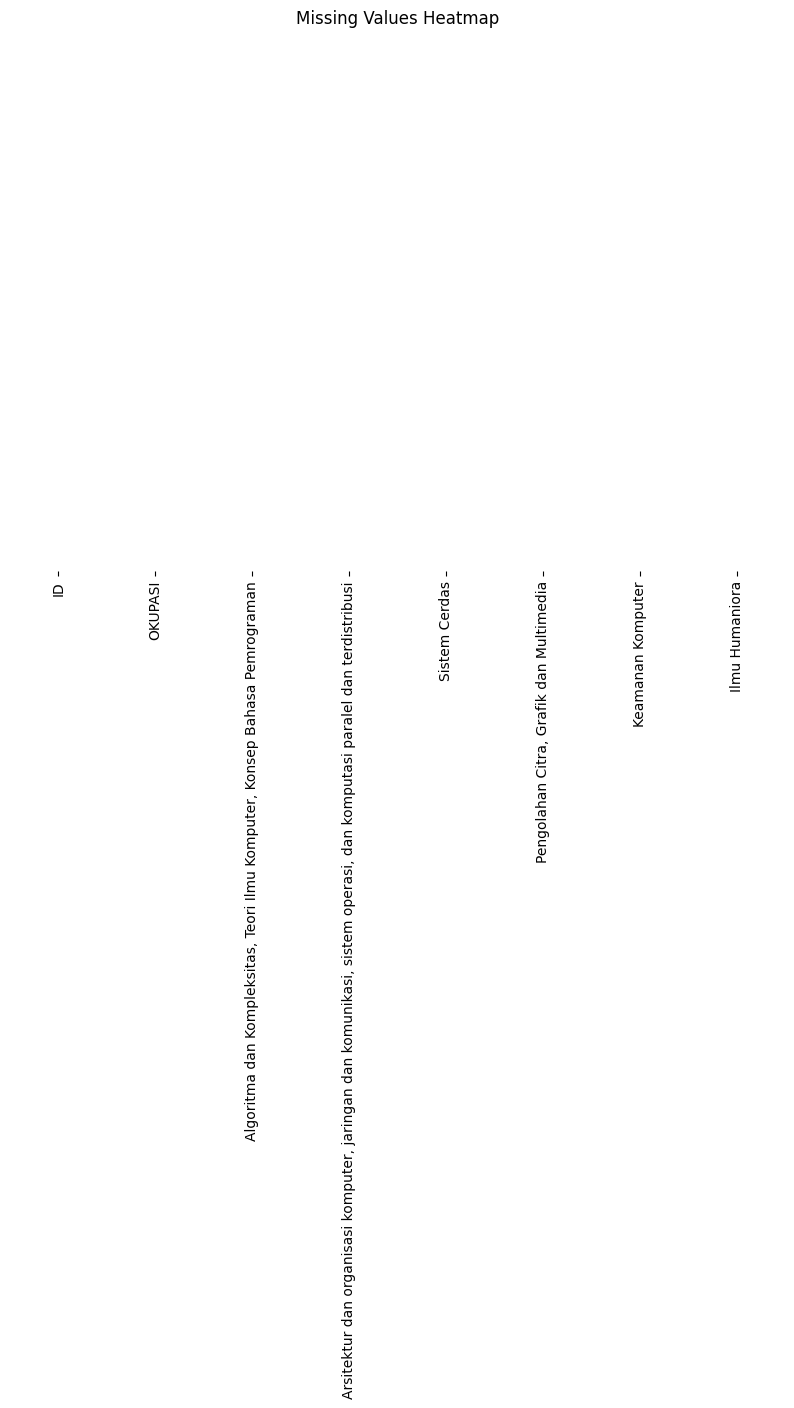

In [43]:
# Create a binary mask where 0 is True and non-zero is False
mask = merged_data_cleaned.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create the heatmap
sns.heatmap(mask, cmap='binary', cbar=False, yticklabels=False)

# Set the title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

## Eksplorasi Data

In [44]:
# Step 1: Basic statistics of the numerical columns
basic_stats = merged_data_cleaned.describe()

basic_stats

,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman","Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi",Sistem Cerdas,"Pengolahan Citra, Grafik dan Multimedia",Keamanan Komputer,Ilmu Humaniora
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,3.008147,2.802444,1.859470,2.753564,3.645621,3.016293
std,0.299549,0.408674,0.834588,0.454414,0.511776,0.382979
min,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
25%,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
max,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000


In [45]:
# Step 2: Distribution of professions
profession_distribution = merged_data_cleaned['OKUPASI'].value_counts()


profession_distribution

OKUPASI
Software Developer                     146
Software Engineer                       90
Software Quality Assurance Engineer     76
Data Analyst                            31
System Analyst                          25
IT Project Manager                      21
Data Engineer                           17
UI/UX Designer                          16
Graphic Designer                        14
Network Engineer                        13
Database Administrator                  13
Network Security Analyst                11
Data Scientist                           6
Network Security Engineer                6
Cyber Security Analyst                   3
Product Designer                         3
Name: count, dtype: int64

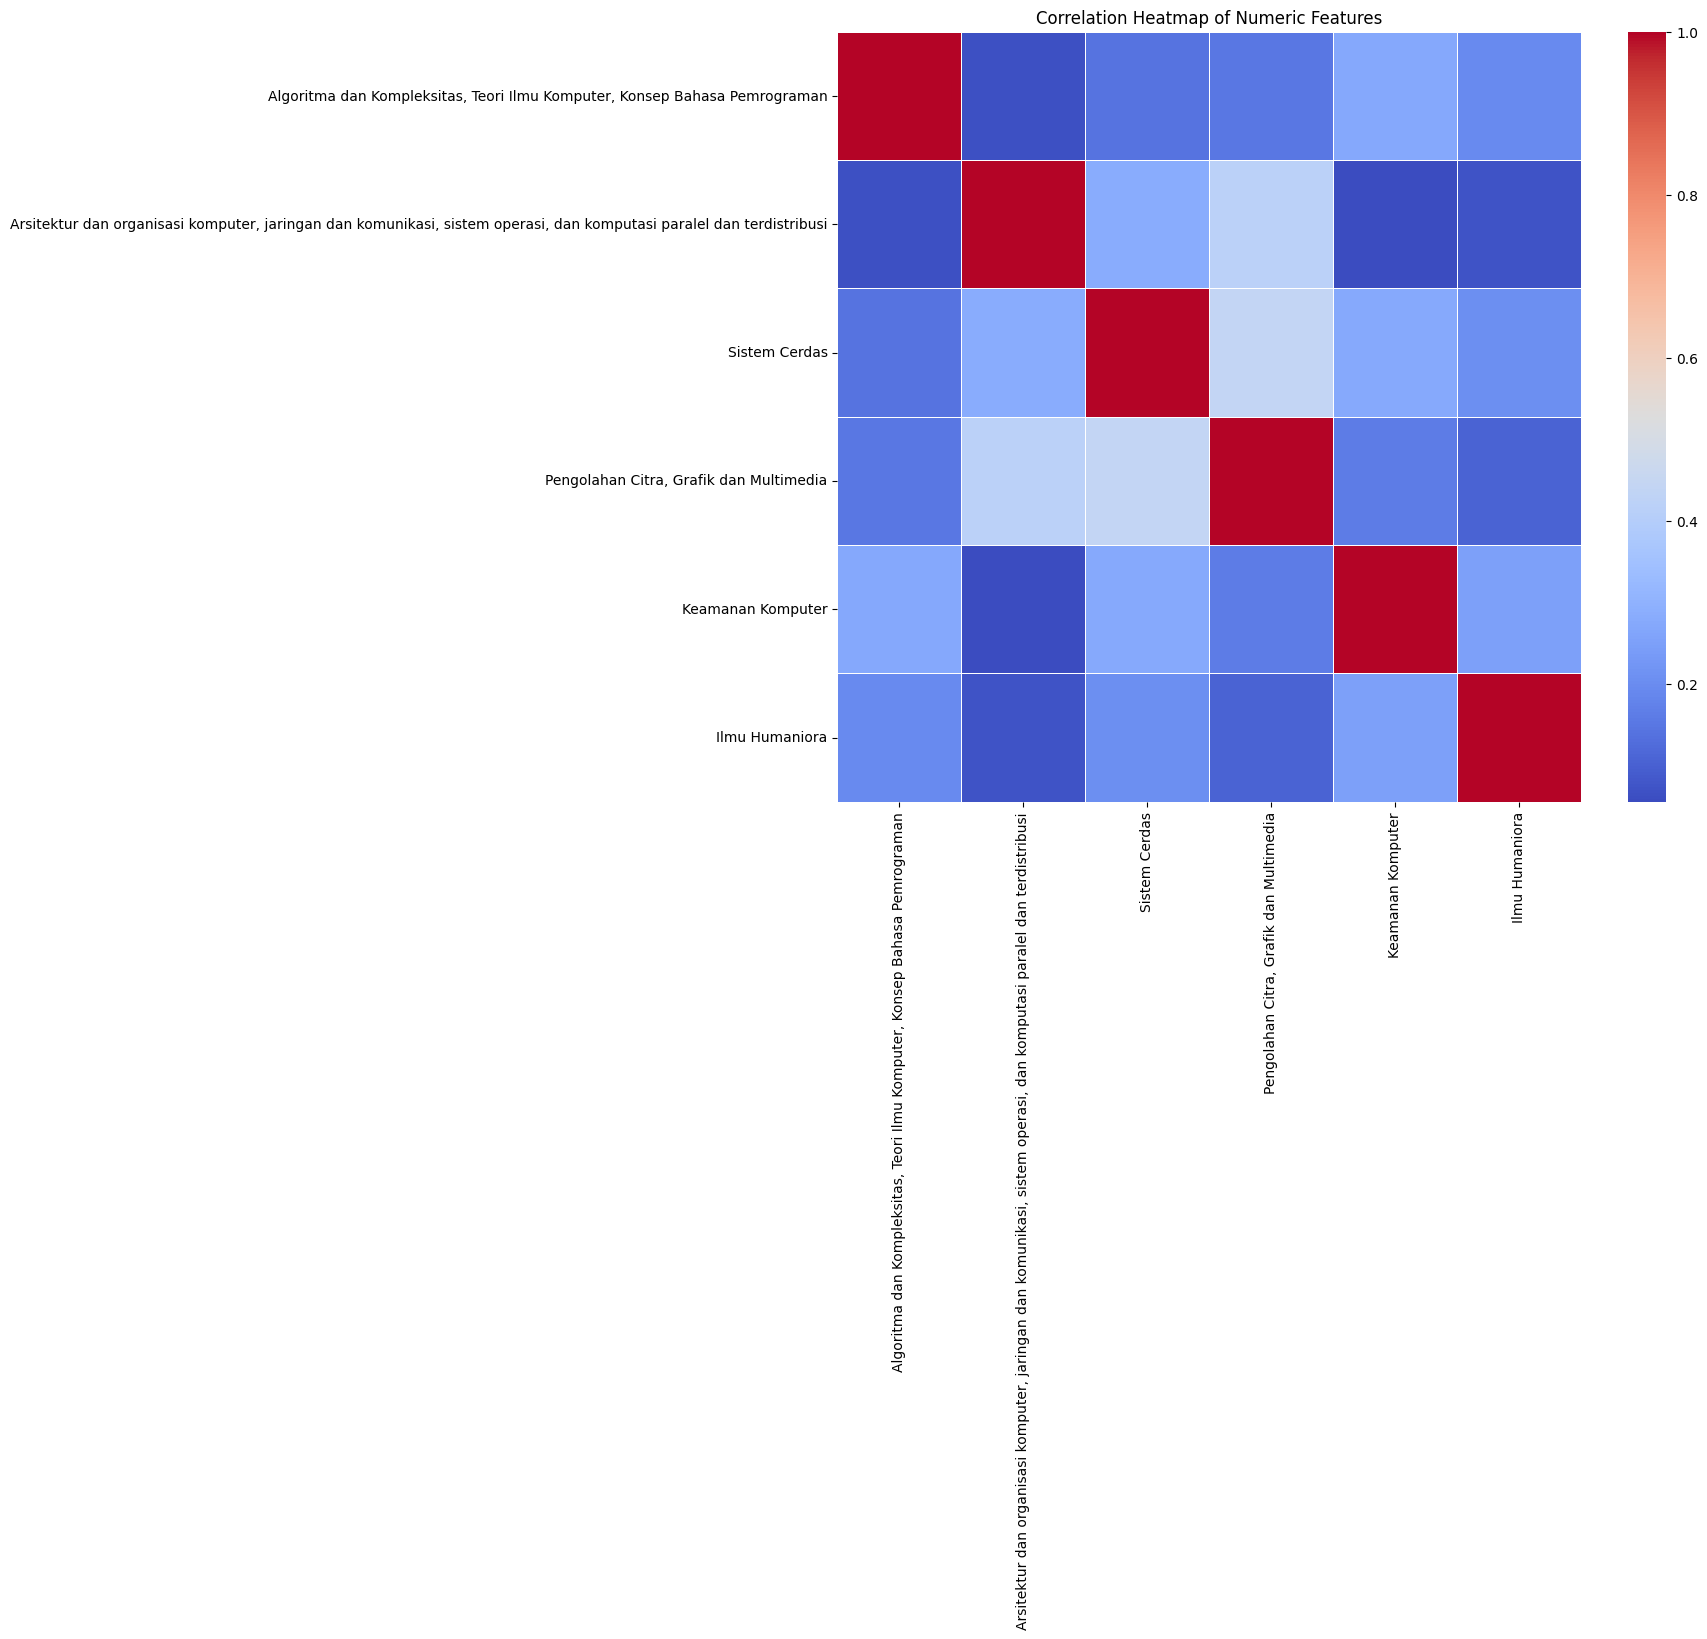

In [46]:
# Select only numeric columns
numeric_columns = merged_data_cleaned.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix using only numeric columns
correlation_matrix = merged_data_cleaned[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [47]:
# # Create a boxplot to show the distribution of IPK by profession
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='OKUPASI', y='IPK', data=merged_data_cleaned, palette='Paired')
# plt.xticks(rotation=90)
# plt.title('IPK Distribution by Profession')
# plt.ylabel('IPK')
# plt.xlabel('Profession')
# plt.show()


In [48]:
merged_data_cleaned

,ID,OKUPASI,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman","Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi",Sistem Cerdas,"Pengolahan Citra, Grafik dan Multimedia",Keamanan Komputer,Ilmu Humaniora
0,Alumni001,System Analyst,3,3,1,3,4,3
1,Alumni002,Software Quality Assurance Engineer,3,3,1,3,4,3
2,Alumni003,Software Engineer,3,3,1,3,3,3
3,Alumni004,Data Engineer,3,3,1,2,3,2
4,Alumni005,Software Engineer,3,3,1,3,4,3
...,...,...,...,...,...,...,...,...
486,Alumni487,Software Quality Assurance Engineer,3,3,3,3,4,4
487,Alumni488,Software Engineer,3,3,3,3,4,3
488,Alumni489,Software Engineer,3,3,2,3,4,3
489,Alumni490,System Analyst,3,3,3,3,4,3


#### Pemetaan Profesi Berdasarkan Peta Okulasi Nasional

In [49]:
export_okupasi = merged_data_cleaned[["ID","OKUPASI"]]

export_okupasi.to_csv("okupasi_id.csv")

In [50]:
# Define the occupation mapping as provided
occupation_mapping = {
    "Data Engineer": "DATA MANAGEMENT SYSTEM",
    "Data Analyst": "DATA MANAGEMENT SYSTEM",
    "Data Scientist": "DATA MANAGEMENT SYSTEM",
    "Database Administrator": "DATA MANAGEMENT SYSTEM",
    "Network Security Analyst": "HARDWARE AND DIGITAL PERIPHERALS",
    "System Analyst": "INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT",
    "Graphic Designer": "IT MULTEMEDIA",
    "UI/UX Designer": "IT MULTEMEDIA",
    "Product Designer": "IT MULTEMEDIA",
    "IT Project Manager": "IT PROJECT MANAGEMENT",
    "Software Quality Assurance Engineer": "IT SECURITY AND COMPLIANCE",
    "Cyber Security Analyst": "IT SECURITY AND COMPLIANCE",
    "Network Security Engineer": "IT SECURITY AND COMPLIANCE",
    "Network Engineer": "NETWORK AND INFRASTRUCTURE",
    "Software Developer": "PROGRAMMING AND SOFTWARE DEVELOPMENT",
    "Software Engineer": "PROGRAMMING AND SOFTWARE DEVELOPMENT"
}

# Apply the mapping to the 'OKUPASI' column
merged_data_cleaned['OKUPASI'] = merged_data_cleaned['OKUPASI'].map(occupation_mapping)

# Display the updated dataframe to the user
merged_data_cleaned

,ID,OKUPASI,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman","Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi",Sistem Cerdas,"Pengolahan Citra, Grafik dan Multimedia",Keamanan Komputer,Ilmu Humaniora
0,Alumni001,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,3,3,1,3,4,3
1,Alumni002,IT SECURITY AND COMPLIANCE,3,3,1,3,4,3
2,Alumni003,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,1,3,3,3
3,Alumni004,DATA MANAGEMENT SYSTEM,3,3,1,2,3,2
4,Alumni005,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,1,3,4,3
...,...,...,...,...,...,...,...,...
486,Alumni487,IT SECURITY AND COMPLIANCE,3,3,3,3,4,4
487,Alumni488,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,3,3,4,3
488,Alumni489,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,2,3,4,3
489,Alumni490,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,3,3,3,3,4,3


## Modeling WGAN

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import random
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [58]:
# Encode the target variable 'OKUPASI'
label_encoder = LabelEncoder()
merged_data_cleaned['Okupasi_encoded'] = label_encoder.fit_transform(merged_data_cleaned['OKUPASI'])

# Define feature set and target variable
X = merged_data_cleaned.drop(['ID', 'OKUPASI', 'Okupasi_encoded'], axis=1)
y = merged_data_cleaned['Okupasi_encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
y_test_tensor = torch.LongTensor(y_test.values)

In [59]:
# check numbers of features in datasets
num_features = merged_data_cleaned.shape[1] - 3
print(num_features)

6


In [60]:
# Set a random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [61]:
# Define the Generator model
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.net(x)

# Define the Critic (Discriminator) model
class Critic(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, x):
        return self.net(x)

In [62]:
# Hyperparameters
input_size = 128  # Size of the latent vector (noise)
hidden_size = 256
output_size = 6  # Number of features
batch_size = 128
epochs = 1000
critic_iterations = 5
weight_clipping_limit = 0.01
lr = 0.00001

In [63]:
# Set manual seed for reproducibility
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

In [64]:
# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [65]:
# Instantiate models
generator = Generator(input_size, hidden_size, output_size).to(device)
critic = Critic(output_size, hidden_size).to(device)

# Define optimizers
optimizer_G = optim.AdamW(generator.parameters(), lr=lr)
optimizer_C = optim.AdamW(critic.parameters(), lr=lr)

# Lists to store loss values and evaluation metrics
losses_G, losses_C = [], []
mse_values, wasserstein_values, val_mse_values = [], [], []

In [66]:
# Training loop
for epoch in range(epochs):
    for _ in range(critic_iterations):
        # Train the critic
        optimizer_C.zero_grad()

        # Sample real data from training data
        real_data = X_train_tensor[torch.randint(0, X_train_tensor.size(0), (batch_size,))].to(device)

        # Sample noise and generate fake data
        noise = torch.randn(batch_size, input_size).to(device)
        fake_data = generator(noise)

        # Compute critic loss
        critic_real = critic(real_data)
        critic_fake = critic(fake_data.detach())
        loss_C = -(torch.mean(critic_real) - torch.mean(critic_fake))

        # Backpropagation and optimization for the critic
        loss_C.backward()
        optimizer_C.step()

        # Weight clipping for the critic
        for p in critic.parameters():
            p.data.clamp_(-weight_clipping_limit, weight_clipping_limit)

    # Train the generator
    optimizer_G.zero_grad()

    # Generate fake data
    noise = torch.randn(batch_size, input_size).to(device)
    fake_data = generator(noise)

    # Compute generator loss
    loss_G = -torch.mean(critic(fake_data))

    # Backpropagation and optimization for the generator
    loss_G.backward()
    optimizer_G.step()

    # Compute Mean Squared Error (MSE) between real and fake data
    mse = F.mse_loss(fake_data, real_data)
    mse_values.append(mse.item())

    # Validate the generator performance using test data
    with torch.no_grad():
        val_real_data = X_test_tensor[torch.randint(0, X_test_tensor.size(0), (batch_size,))].to(device)
        val_fake_data = generator(torch.randn(batch_size, input_size).to(device))
        val_mse = F.mse_loss(val_fake_data, val_real_data)
        val_mse_values.append(val_mse.item())

    # Wasserstein distance (just use the critic loss for the real and fake data)
    wasserstein_distance = torch.mean(critic_real) - torch.mean(critic_fake)
    wasserstein_values.append(wasserstein_distance.item())

    # Store losses for visualization
    losses_G.append(loss_G.item())
    losses_C.append(loss_C.item())

    # Print loss and metrics values every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss C: {loss_C.item()}, Loss G: {loss_G.item()}, MSE: {mse.item()}, 'f'Val MSE: {val_mse.item()}, Wasserstein: {wasserstein_distance.item()}')

Epoch [0/1000], Loss C: -0.000112924724817276, Loss G: -0.00835471786558628, MSE: 0.9819780588150024, Val MSE: 1.2239755392074585, Wasserstein: 0.000112924724817276
Epoch [100/1000], Loss C: -9.8448246717453e-05, Loss G: -0.00865205843001604, MSE: 1.0634984970092773, Val MSE: 1.2559096813201904, Wasserstein: 9.8448246717453e-05
Epoch [200/1000], Loss C: -3.4242868423461914e-05, Loss G: -0.008433617651462555, MSE: 1.0003060102462769, Val MSE: 1.2960739135742188, Wasserstein: 3.4242868423461914e-05
Epoch [300/1000], Loss C: -0.00016273465007543564, Loss G: -0.008419008925557137, MSE: 0.9808094501495361, Val MSE: 1.3726475238800049, Wasserstein: 0.00016273465007543564
Epoch [400/1000], Loss C: 7.896684110164642e-06, Loss G: -0.008611312136054039, MSE: 1.1288630962371826, Val MSE: 1.3402252197265625, Wasserstein: -7.896684110164642e-06
Epoch [500/1000], Loss C: 5.343649536371231e-05, Loss G: -0.008759589865803719, MSE: 1.1474049091339111, Val MSE: 1.1421422958374023, Wasserstein: -5.343649

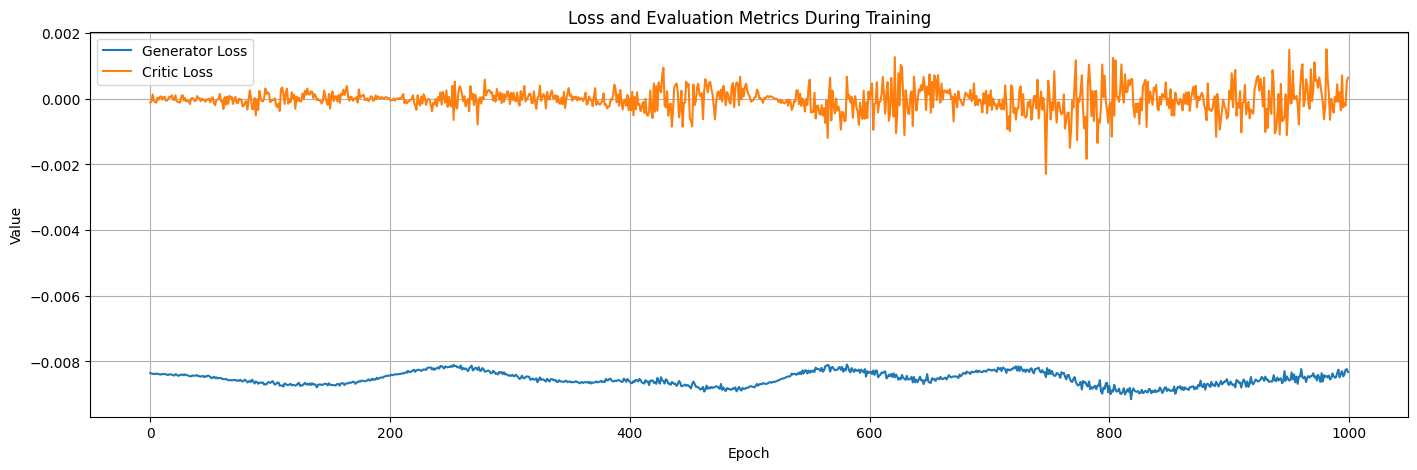

In [67]:
# Plot the losses and evaluation metrics
plt.figure(figsize=(17,5))
plt.title("Loss and Evaluation Metrics During Training")
plt.plot(losses_G, label="Generator Loss")
plt.plot(losses_C, label="Critic Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

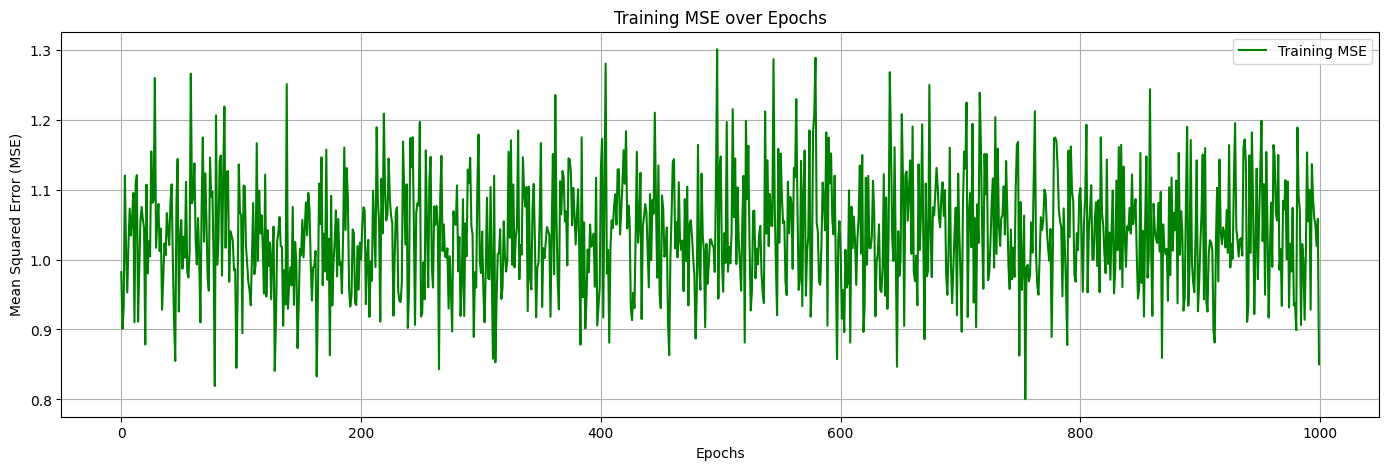

In [68]:
plt.figure(figsize=(17,5))
plt.plot( mse_values, label='Training MSE', color='green')
plt.title('Training MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

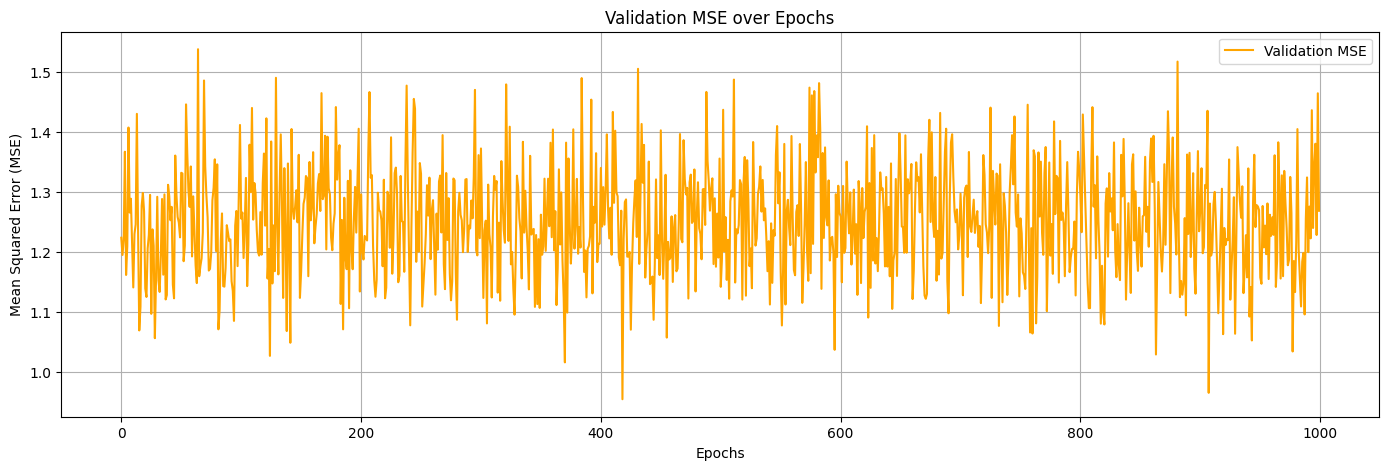

In [69]:
# Plot Validation MSE values
plt.figure(figsize=(17,5))
plt.plot(val_mse_values, label='Validation MSE', color='orange')
plt.title('Validation MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()


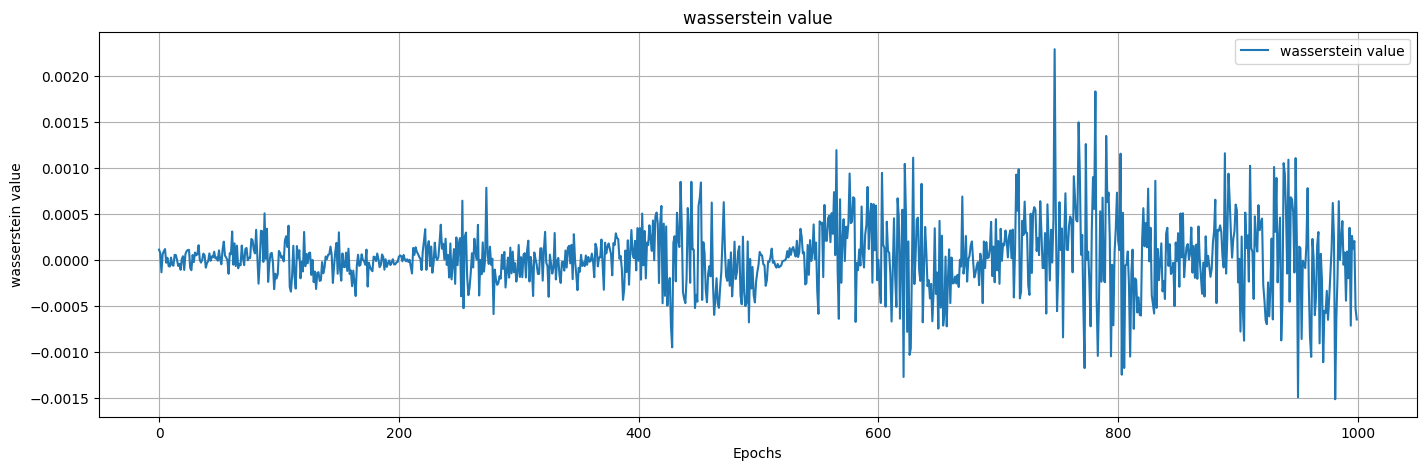

In [70]:
# Plot Wasserstein value
plt.figure(figsize=(17,5))
plt.plot(wasserstein_values, label='wasserstein value')
plt.title('wasserstein value')
plt.xlabel('Epochs')
plt.ylabel('wasserstein value')
plt.grid(True)
plt.legend()
plt.show()

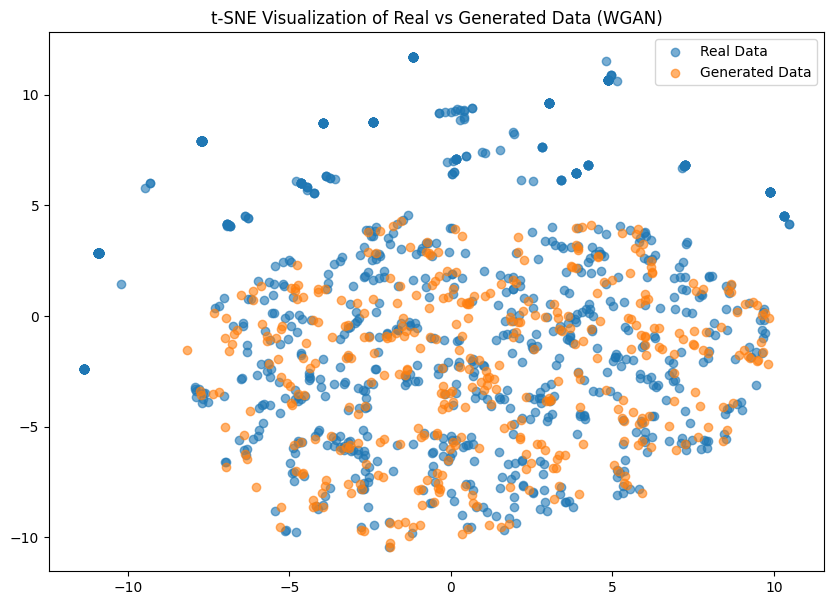

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_tensor.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results
plt.figure(figsize=(10,7))
plt.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], label="Real Data", alpha=0.6)
plt.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], label="Generated Data", alpha=0.6)
plt.title("t-SNE Visualization of Real vs Generated Data (WGAN)")
plt.legend()
plt.show()


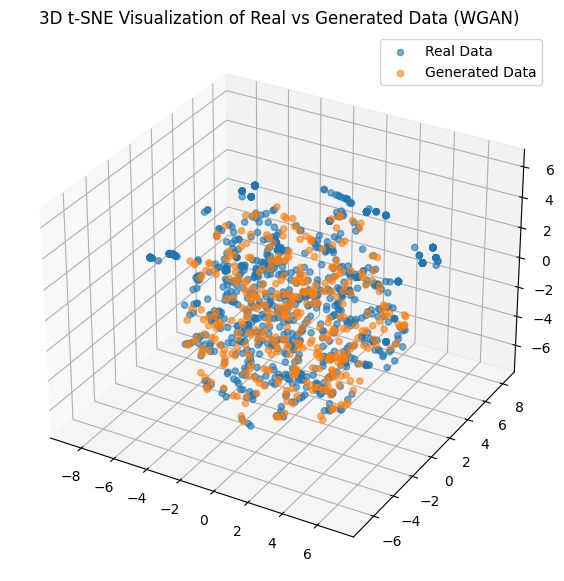

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_tensor.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], tsne_results[:1000, 2], label="Real Data", alpha=0.6)
ax.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], tsne_results[1000:, 2], label="Generated Data", alpha=0.6)
ax.set_title("3D t-SNE Visualization of Real vs Generated Data (WGAN)")
ax.legend()
plt.show()


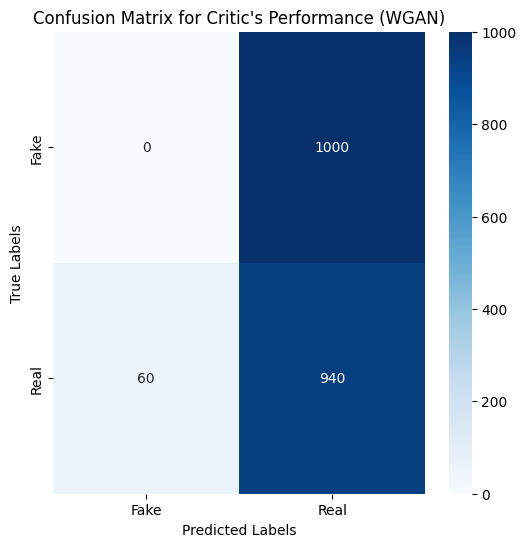

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Number of samples for evaluation
n_samples = 1000

# Generate real and fake data for evaluation
real_data = X_train_tensor[torch.randint(0, X_train_tensor.size(0), (n_samples,))].to(device)
noise = torch.randn(n_samples, input_size).to(device)
fake_data = generator(noise)

# Critic predictions
critic_real = critic(real_data)
critic_fake = critic(fake_data)

# Threshold the Critic output to get binary labels (1 for real, 0 for fake)
pred_real = (critic_real >= 0).float().cpu().numpy()  # Predicted labels for real data
pred_fake = (critic_fake >= 0).float().cpu().numpy()  # Predicted labels for fake data

# Actual labels
true_real = np.ones(n_samples)  # True labels for real data (1)
true_fake = np.zeros(n_samples)  # True labels for fake data (0)

# Combine the labels
true_labels = np.concatenate([true_real, true_fake])
pred_labels = np.concatenate([pred_real, pred_fake])

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Critic's Performance (WGAN)")
plt.show()

## Modelling WGAN-GP

In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import AdamW
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Preprocessing

In [97]:
# One-hot encode the profession
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable 'OKUPASI'
label_encoder = LabelEncoder()
merged_data_cleaned['Okupasi_encoded'] = label_encoder.fit_transform(merged_data_cleaned['OKUPASI'])

# Define feature set and target variable
X = merged_data_cleaned.drop(['ID', 'OKUPASI', 'Okupasi_encoded'], axis=1)
y = merged_data_cleaned['Okupasi_encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
y_test_tensor = torch.LongTensor(y_test.values)

## Define Generator and Critic (Discriminator) Models

In [98]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.net(x)


class Critic(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, x):
        return self.net(x)


## Gradient Penalty Function

In [99]:
def compute_gradient_penalty(critic, real_samples, fake_samples):
    alpha = torch.rand((real_samples.size(0), 1), device=device)
    alpha = alpha.expand_as(real_samples)

    # Interpolate between real and fake data
    interpolates = alpha * real_samples + (1 - alpha) * fake_samples
    interpolates = interpolates.requires_grad_(True)

    critic_interpolates = critic(interpolates)

    gradients = grad(
        outputs=critic_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(critic_interpolates),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


## Hyperparameters and Initial Setup

In [100]:
# Hyperparameters
input_size = 128  # Size of the noise vector
hidden_size = 256
output_size = 6  # Number of features in the dataset (exclude the target column)
lr = 0.00001  # Learning rate
batch_size = 128
n_epochs = 1000
n_critic = 5  # Critic steps per generator step
lambda_gp = 10  # Weight for gradient penalty
seed = 42  # Manual seed for reproducibility

# Set manual random seed for reproducibility
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming Generator and Critic are defined classes, instantiate models
generator = Generator(input_size, hidden_size, output_size).to(device)
critic = Critic(output_size, hidden_size).to(device)

# Optimizers
optimizer_G = AdamW(generator.parameters(), lr=lr, betas=(0.5, 0.9), weight_decay=1e-4)
optimizer_C = AdamW(critic.parameters(), lr=lr, betas=(0.5, 0.9), weight_decay=1e-4)

## Training Loop

In [101]:
# Hyperparameters for early stopping
patience = 1000  # Number of epochs to wait for improvement
min_delta = 0.001  # Minimum change in the monitored loss to qualify as improvement
best_loss = float('inf')  # Initialize best loss with a very large number
early_stop_counter = 0  # Counter to track patience

In [102]:
critic_losses = []
generator_losses = []
mse_values = []
wasserstein_values = []
val_mse_values = []  # To store validation MSE for tracking performance

for epoch in range(n_epochs):
    generator.train()  # Set the generator to training mode
    critic.train()     # Set the critic to training mode

    for _ in range(n_critic):
        # Train the critic
        real_samples = X_train_tensor[torch.randint(0, X_train_tensor.size(0), (batch_size,))].to(device)
        latent_space_samples = torch.randn((batch_size, input_size)).to(device)
        fake_samples = generator(latent_space_samples).detach()

        critic_real = critic(real_samples)
        critic_fake = critic(fake_samples)

        # Compute Wasserstein distance
        wasserstein_distance = torch.mean(critic_real) - torch.mean(critic_fake)

        # Compute gradient penalty
        gradient_penalty = compute_gradient_penalty(critic, real_samples, fake_samples)
        loss_critic = -wasserstein_distance + lambda_gp * gradient_penalty

        optimizer_C.zero_grad()
        loss_critic.backward()
        optimizer_C.step()

    # Train the generator
    latent_space_samples = torch.randn((batch_size, input_size)).to(device)
    fake_samples = generator(latent_space_samples)
    loss_generator = -torch.mean(critic(fake_samples))

    optimizer_G.zero_grad()
    loss_generator.backward()
    optimizer_G.step()

    # Store losses
    critic_losses.append(loss_critic.item())
    generator_losses.append(loss_generator.item())

    # Compute MSE between real and fake data (training set)
    mse = torch.mean((fake_samples - real_samples) ** 2).item()
    mse_values.append(mse)

    # Compute Wasserstein distance
    wasserstein_values.append(wasserstein_distance.item())

    # Validation step: Use validation data to calculate MSE
    with torch.no_grad():
        val_real_samples = X_test_tensor[torch.randint(0, X_test_tensor.size(0), (batch_size,))].to(device)
        val_latent_space_samples = torch.randn((batch_size, input_size)).to(device)
        val_fake_samples = generator(val_latent_space_samples)
        val_mse = torch.mean((val_fake_samples - val_real_samples) ** 2).item()
        val_mse_values.append(val_mse)

    # Check for early stopping
    if loss_generator.item() < best_loss - min_delta:
        best_loss = loss_generator.item()  # Update best loss
        early_stop_counter = 0  # Reset counter if improvement
        # Optionally save the best model
        # torch.save(generator.state_dict(), "best_generator.pth")
        # torch.save(critic.state_dict(), "best_critic.pth")
    else:
        early_stop_counter += 1  # Increment the counter

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break  # Stop training if patience is exceeded

    # Print losses occasionally
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{n_epochs}] | Critic Loss: {loss_critic.item()} | Generator Loss: {loss_generator.item()} | "f"Train MSE: {mse} | Val MSE: {val_mse} | Wasserstein Distance: {wasserstein_distance.item()}")

Epoch [0/1000] | Critic Loss: 4.318889617919922 | Generator Loss: 0.01883385330438614 | Train MSE: 0.9819780588150024 | Val MSE: 1.2239913940429688 | Wasserstein Distance: 0.049991339445114136
Epoch [100/1000] | Critic Loss: 0.09696086496114731 | Generator Loss: -0.029032593593001366 | Train MSE: 1.067674994468689 | Val MSE: 1.2519440650939941 | Wasserstein Distance: -0.09681685268878937
Epoch [200/1000] | Critic Loss: -0.011945724487304688 | Generator Loss: -0.06504516303539276 | Train MSE: 1.0039385557174683 | Val MSE: 1.2961640357971191 | Wasserstein Distance: 0.011948592960834503
Epoch [300/1000] | Critic Loss: 0.02887960709631443 | Generator Loss: -0.03218596801161766 | Train MSE: 0.9860881567001343 | Val MSE: 1.3788928985595703 | Wasserstein Distance: -0.02887769229710102
Epoch [400/1000] | Critic Loss: 0.012303070165216923 | Generator Loss: 0.009149787947535515 | Train MSE: 1.1375224590301514 | Val MSE: 1.3487825393676758 | Wasserstein Distance: -0.01219357829540968
Epoch [500/1

## Model Post Viz

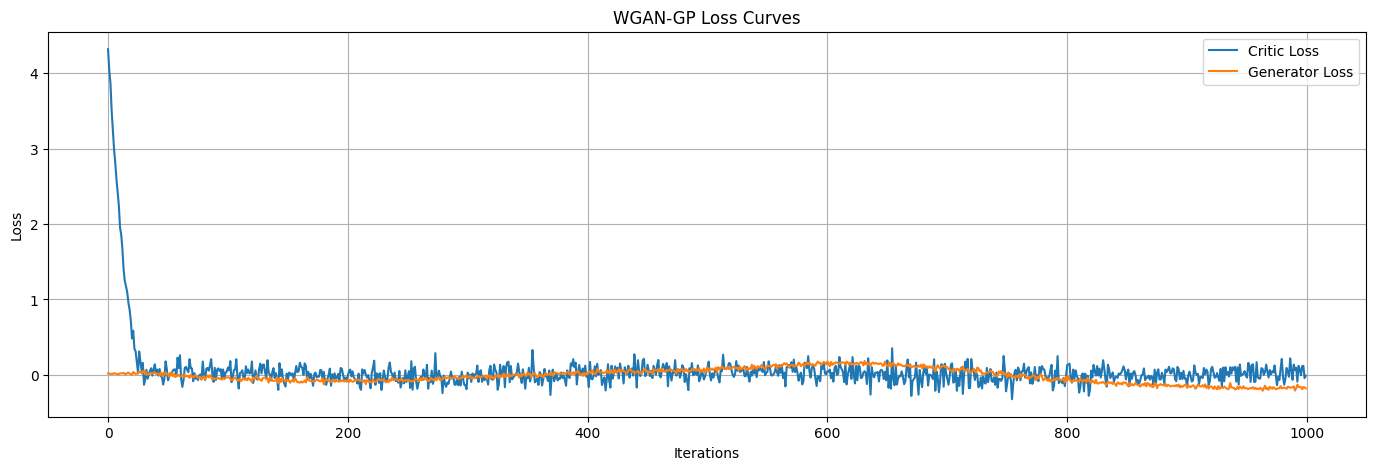

In [103]:
# Plot the loss curves
plt.figure(figsize=(17,5))
plt.plot(critic_losses, label="Critic Loss")
plt.plot(generator_losses, label="Generator Loss")
plt.title("WGAN-GP Loss Curves")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


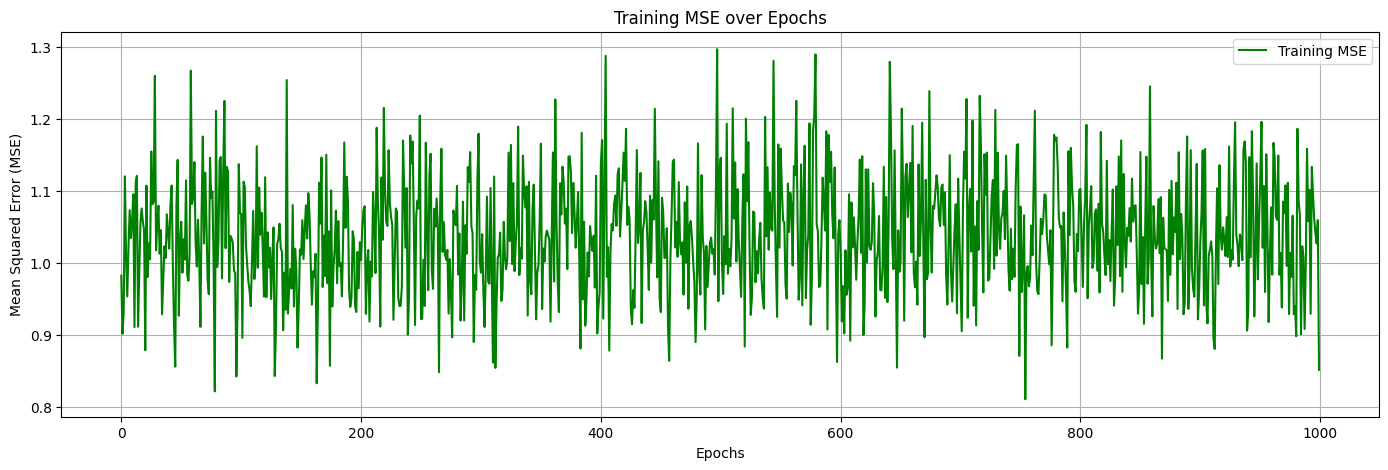

In [104]:
plt.figure(figsize=(17,5))
plt.plot( mse_values, label='Training MSE', color='green')
plt.title('Training MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

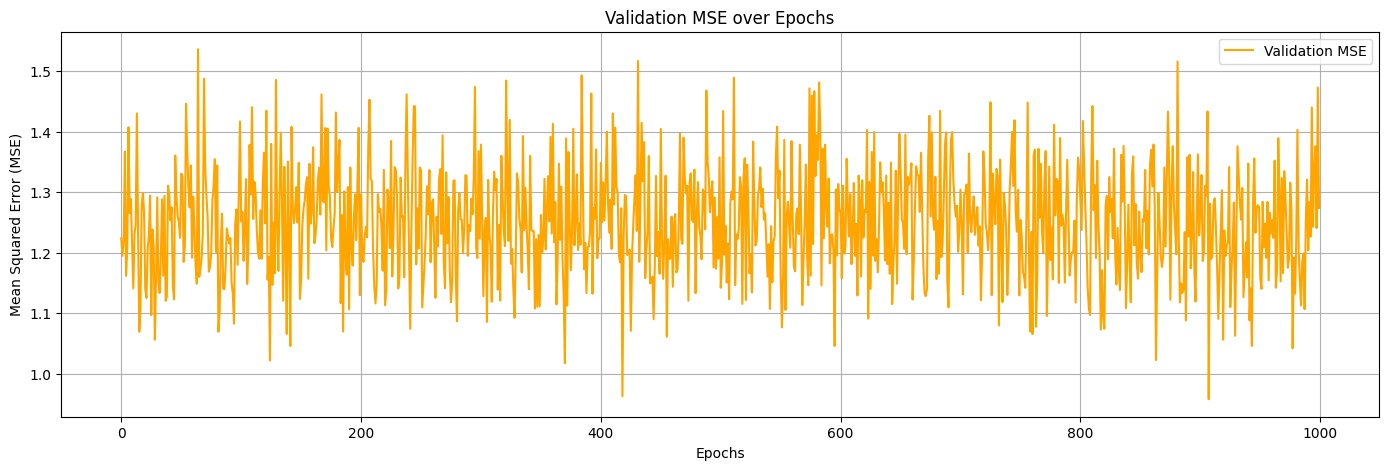

In [105]:
# Plot Validation MSE values
plt.figure(figsize=(17,5))
plt.plot(val_mse_values, label='Validation MSE', color='orange')
plt.title('Validation MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()


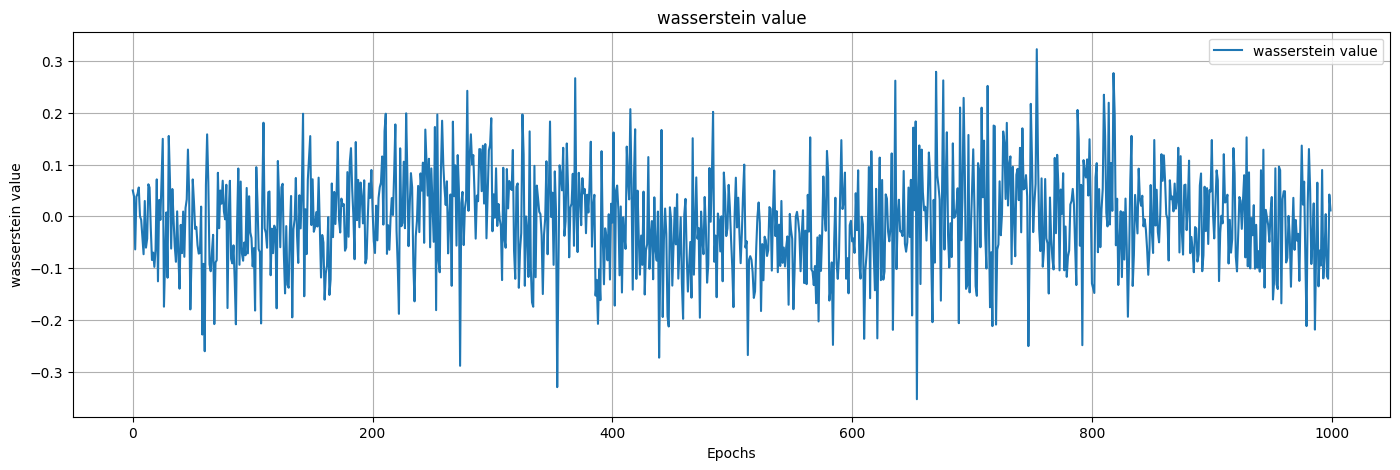

In [106]:
# Plot wasserstein value
plt.figure(figsize=(17,5))
plt.plot(wasserstein_values, label='wasserstein value')
plt.title('wasserstein value')
plt.xlabel('Epochs')
plt.ylabel('wasserstein value')
plt.grid(True)
plt.legend()
plt.show()

## Visualizing Real vs Generated Data with t-SNE

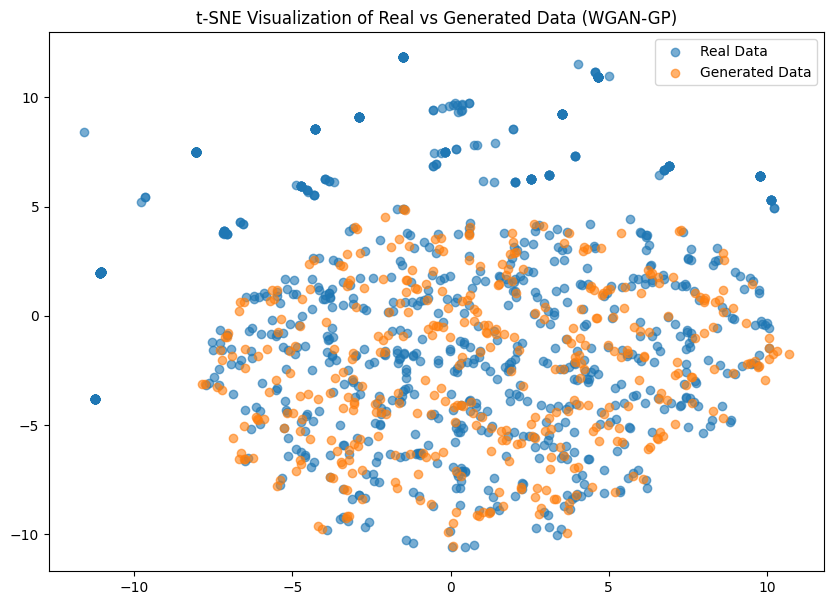

In [107]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_tensor.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results
plt.figure(figsize=(10,7))
plt.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], label="Real Data", alpha=0.6)
plt.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], label="Generated Data", alpha=0.6)
plt.title("t-SNE Visualization of Real vs Generated Data (WGAN-GP)")
plt.legend()
plt.show()


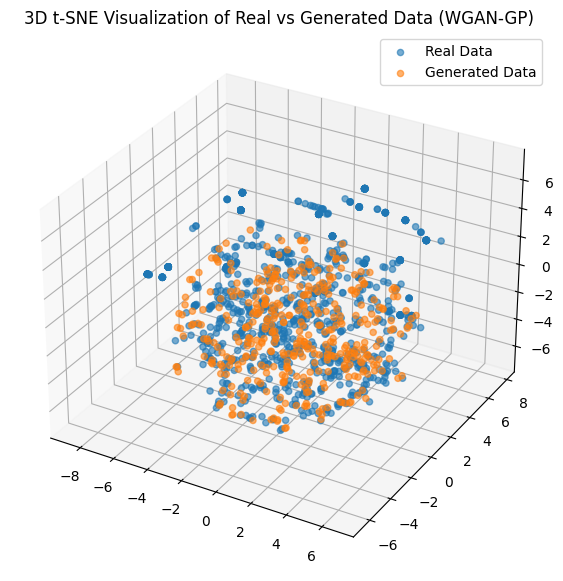

In [108]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_tensor.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], tsne_results[:1000, 2], label="Real Data", alpha=0.6)
ax.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], tsne_results[1000:, 2], label="Generated Data", alpha=0.6)
ax.set_title("3D t-SNE Visualization of Real vs Generated Data (WGAN-GP)")
ax.legend()
plt.show()


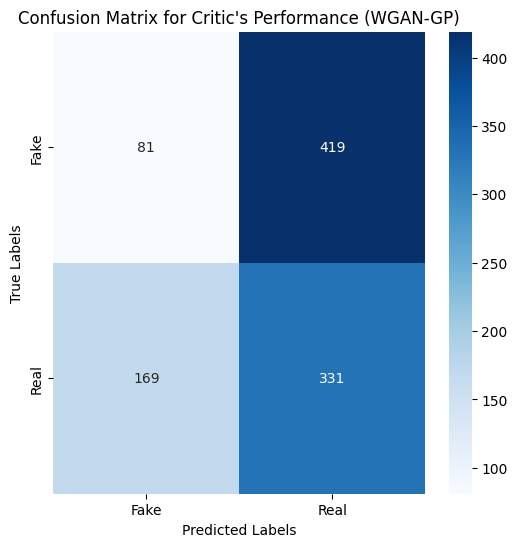

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch.nn.functional as F

# Number of samples for evaluation
n_samples = 1000

# Generate real and fake data for evaluation
real_data = X_train_tensor[torch.randint(0, X_train_tensor.size(0), (n_samples,))].to(device)
noise = torch.randn(n_samples, input_size).to(device)
fake_data = generator(noise)

# Critic predictions
critic_real = critic(real_data)
critic_fake = critic(fake_data)

# Threshold the Critic output to get binary labels (1 for real, 0 for fake)
pred_real = (critic_real >= 0).float().cpu().numpy()  # Predicted labels for real data
pred_fake = (critic_fake >= 0).float().cpu().numpy()  # Predicted labels for fake data

# Actual labels
true_real = np.ones(n_samples)  # True labels for real data (1)
true_fake = np.zeros(n_samples)  # True labels for fake data (0)

# Combine the labels
true_labels = np.concatenate([true_real, true_fake])
pred_labels = np.concatenate([pred_real, pred_fake])

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Critic's Performance (WGAN-GP)")
plt.show()

In [ ]:
# Load the best saved model
generator.load_state_dict(torch.load("best_generator.pth"))
critic.load_state_dict(torch.load("best_critic.pth"))

## Model Deployment